 <font color = Blue size = 5> Future Sales Prediction with Machine Learning </font>


Starting a new business venture can be an exciting and daunting experience. You have a unique idea, and now you want to bring it to life. However, a major challenge that many entrepreneurs face is managing their resources efficiently, especially when it comes to production and advertising costs. Fortunately, machine learning can help you navigate this challenge with ease.

One way machine learning can be applied to your business is through predicting future product sales.
Machine learning can assist you in determining the most effective advertising strategy for your business. By analyzing consumer behavior and their response to various advertising campaigns, machine learning algorithms can help you tailor your advertising efforts to reach the right audience at the right time. This can help you optimize your advertising budget and maximize your return on investment.

Moreover, machine learning can be used to develop personalized product recommendations for your customers. By analyzing customer data, such as purchase history and search behavior, machine learning algorithms can provide customized product recommendations to each customer. This can lead to increased customer satisfaction and loyalty, ultimately boosting your business's revenue.


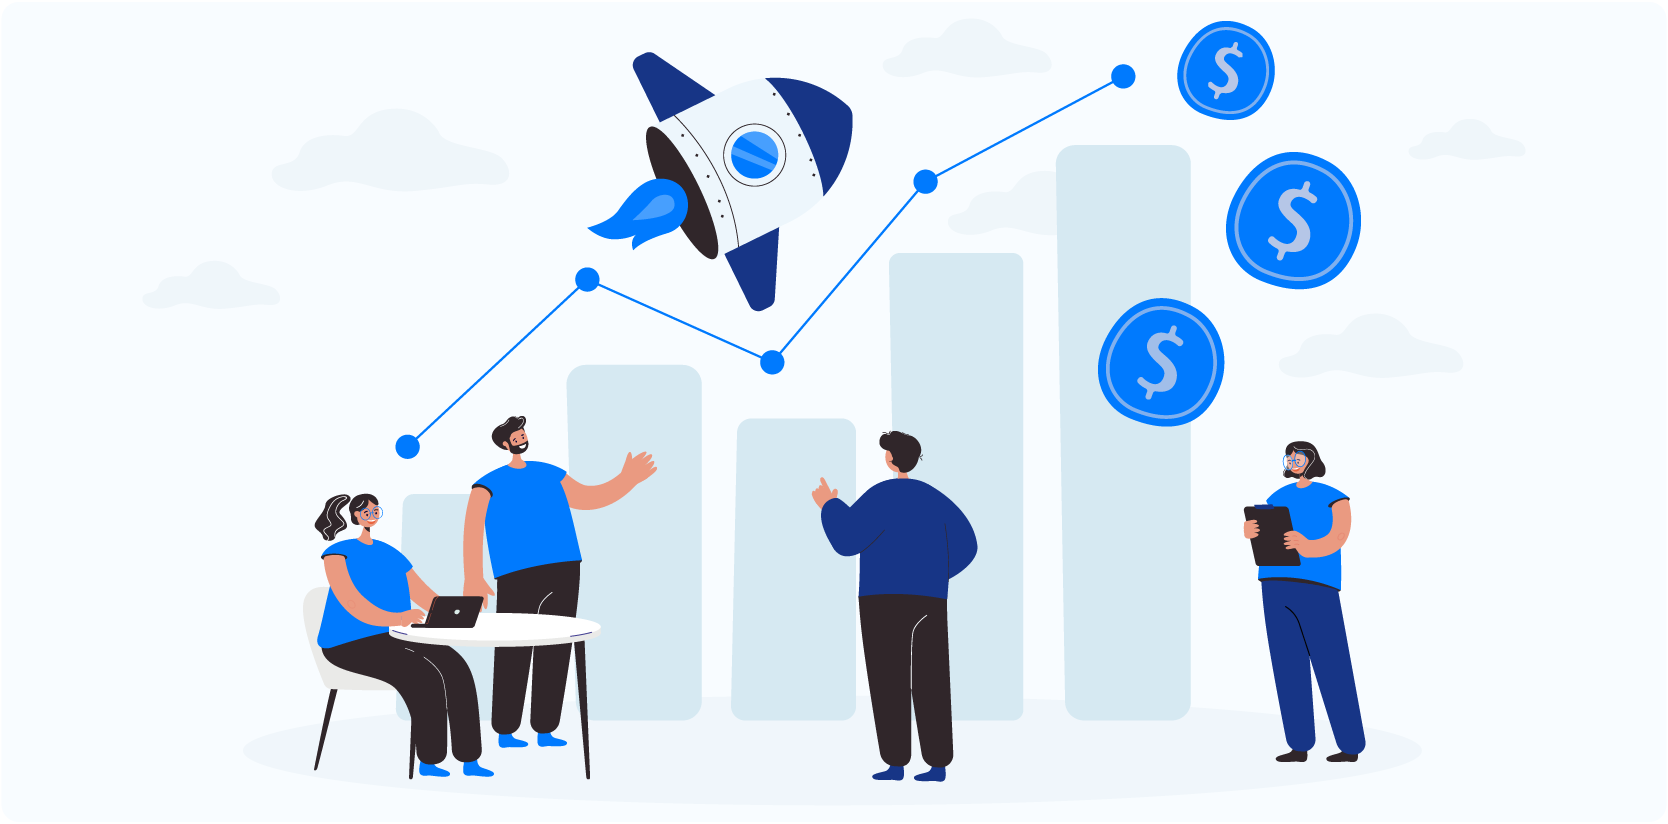

### Business Goal 
Predicting the future sales of a product helps a business manage the manufacturing and advertising cost of the product. There are many more benefits of predicting the future sales of a product.So  by analyzing past sales data and customer behavior patterns, machine learning algorithms can provide you with accurate predictions about your future product sales. 
This can help you plan your production process more efficiently and avoid overproduction, which can lead to waste and unnecessary expenses.

## Importing libraries

In [83]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Preparing and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import os
import statsmodels.formula.api as sm


### Step 1: Reading and Understanding the Data


1. Importing data using the pandas library
2. Understanding the structure of the data

In [35]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# EDA

In [36]:
data.shape

(200, 4)

In [37]:
data.describe()   #Descriptive statistical analysis

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Check missing values

In [38]:
data.info()   #Checking basic database information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


We can see no missing values in the data.

Check null values

In [39]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

This dataset doesn’t have any null values.

### Step 2 : Data Cleaning and Preparation

We will skip this step since our dataset is clean and doesn't have any null or missing values.


 ### Step 3:Visualizing the data

Check relation between features and target

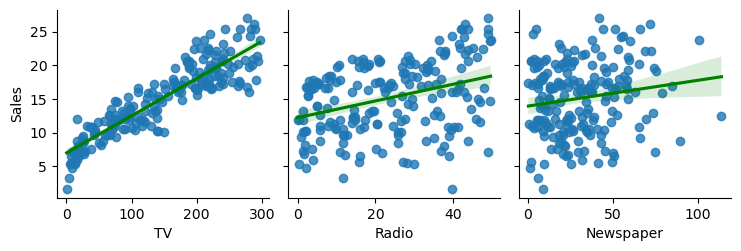

In [40]:
import seaborn as sns
x_vars = ["TV", "Radio", "Newspaper"]
y_var = "Sales"

sns.pairplot(data, x_vars=x_vars, y_vars=y_var, kind="reg",plot_kws={'line_kws':{'color':'green'}})
plt.show()

<Axes: ylabel='Newspaper'>

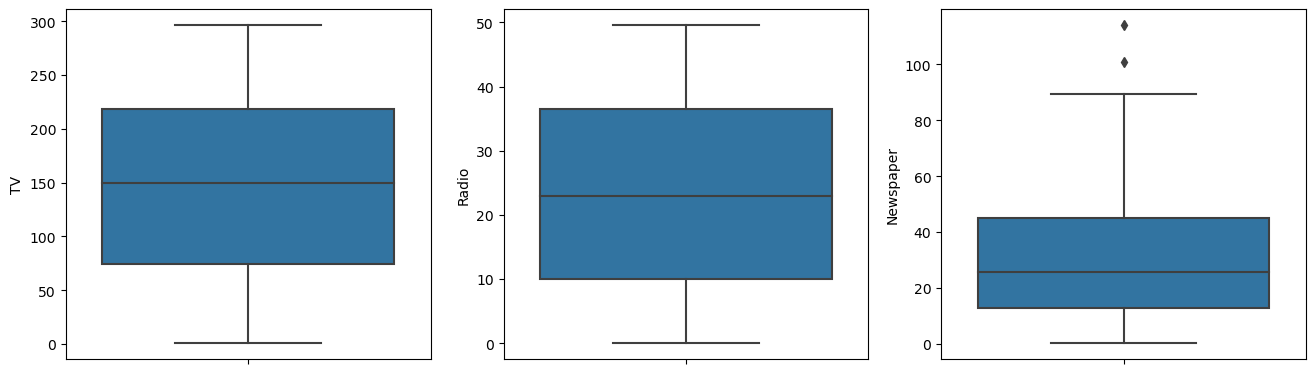

In [41]:
# Check outliers
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=data, y='TV')

plt.subplot(2, 3, 2)
sns.boxplot(data=data, y='Radio')

plt.subplot(2, 3, 3)
sns.boxplot(data=data, y='Newspaper')

There are outliers exist in 'Newspaper'.

Out of all the amount spent on advertising on various platforms, we can see that the amount spent on advertising the product on TV results in more sales of the product. Now let’s have a look at the correlation of all the columns with the sales column:

In [14]:
correlation = data.corr()
correlation["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [18]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


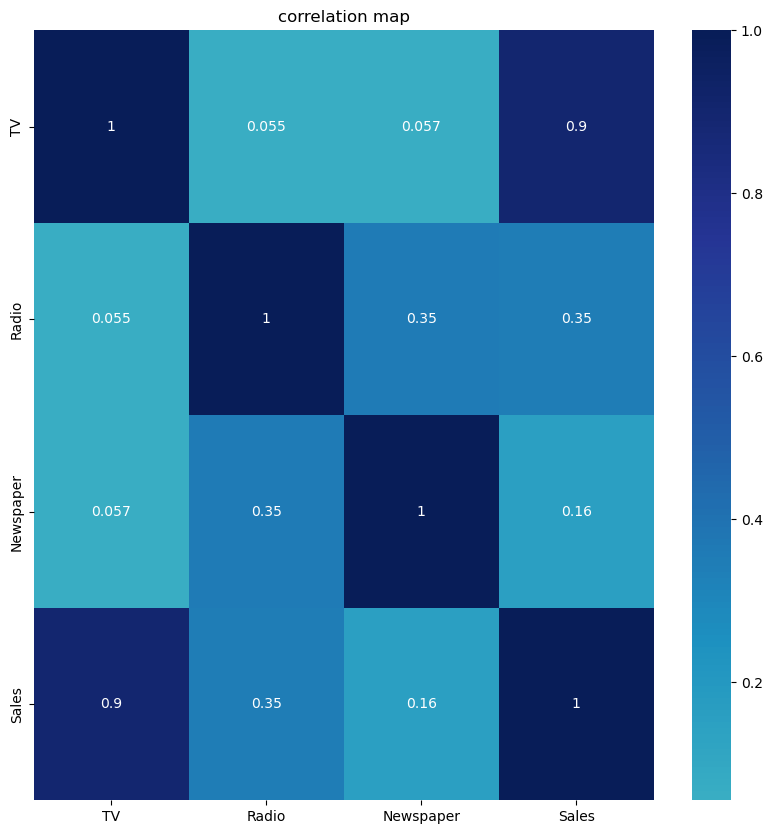

In [21]:
matrix=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrix,annot=True,cmap="YlGnBu",center=0)
plt.title("correlation map")
plt.show()

The Heatmap gives us a color estimate of the values. Depending on the selected palette, we either get darker coloring for higher values, or vice versa.
It is important to note that the correlation coefficient values are between -1 and 1 respectively. The higher the positive correlation between features, the more the value of the correlation coefficient will shift to 1.
The variable most strongly correlated with sales is TV.

In [48]:
total_expenditure_tv = data['TV'].sum()  #calculate the total expenditure on TV advertising by summing up the values in the 'TV' column of the DataFrame data.
total_expenditure_newspaper = data['Newspaper'].sum()  #calculate the total expenditure on Newspaper advertising by summing up the values in the 'Newspaper' column of the DataFrame data.
total_expenditure_radio = data['Radio'].sum()  #calculates the total expenditure on Radio advertising by summing up the values in the 'Radio' column of the DataFrame data.
"total expenditure of each advertising :","TV:", total_expenditure_tv,"Newspaper",total_expenditure_newspaper,"Radio",total_expenditure_radio

('total expenditure of each advertising :',
 'TV:',
 29408.5,
 'Newspaper',
 6110.799999999999,
 'Radio',
 4652.800000000001)

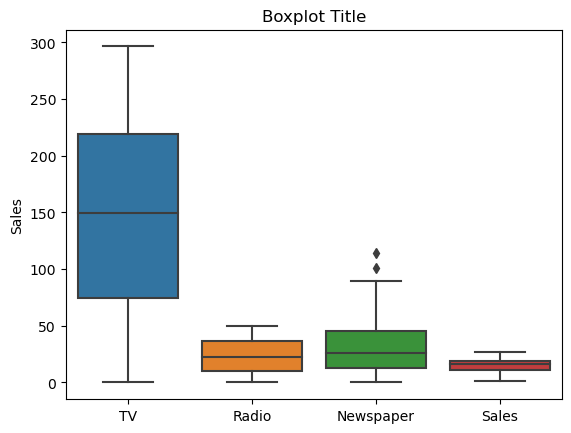

In [55]:
sns.boxplot(data=data)
plt.title("Boxplot Title")
plt.ylabel("Sales")
plt.show()

As we see Newspaper have outliers.

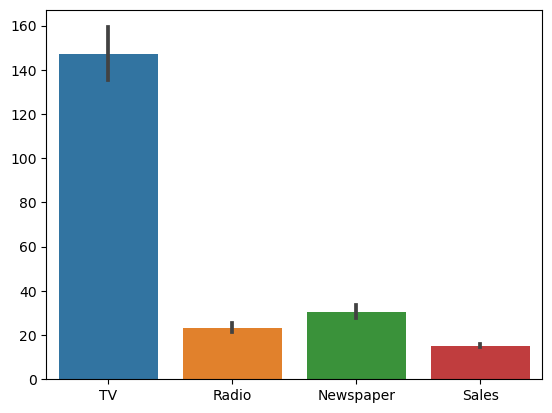

In [56]:
sns.barplot( data = data)
plt.show()


<font size = 3 color = green> sns.boxplot(data=df) </font>is used for visualizing the distribution and spread of numerical data, while <font size = 3 color = green>sns.barplot(data=df) </font>  is used for comparing numerical values across different categories or groups. 

## Step 4.Splitting  X, Y features


In [57]:
#Dividing data into X and Y variables
X=data.drop(columns="Sales",axis=1)
Y=data["Sales"]

In [59]:
X.shape

(200, 3)

In [60]:
Y.shape

(200,)

## Step 5: Train-Test Split 

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

## Step 6.Preprocessing

In [69]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

In [70]:
#applying standard scaler
std=StandardScaler()


In [71]:
x_trainscaler=std.fit_transform(x_train)
x_testscaler=std.fit_transform(x_test)

## Step 7. LinearRegression model building
## Step 8 : Prediction and Evaluation

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [85]:
# Linear Regression Model

lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()

In [87]:
print(lin_model.params, "\n")

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64 



In [100]:
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.60
Root Mean Squared Error: 1.61
R-squared: 0.89


The lower MSE and RMSE values indicate that the model is making relatively accurate predictions. The high R² value (close to 1) suggests that the model is explaining a significant portion of the variability in the Sales data, indicating a good fit.

R-2, known as the coefficient of determination, shows how well the model fits the database. 1 indicates that the model is confident.

### let make predictions on new data

In [94]:
new_data_1 = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales_1 = lin_model.predict(new_data_1)
print("Predicted Sales (Data 1):", predicted_sales_1)

Predicted Sales (Data 1): 0    15.428155
dtype: float64


In [95]:
new_data_2 = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales_2 = lin_model.predict(new_data_2)
print("Predicted Sales (Data 2):", predicted_sales_2)

Predicted Sales (Data 2): 0    12.754199
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

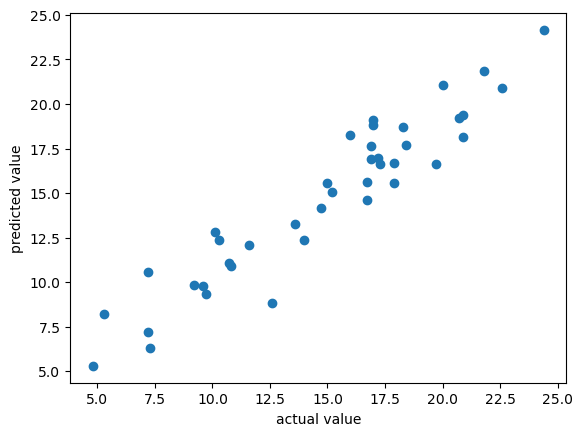

In [97]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show

Text(0, 0.5, 'predict')

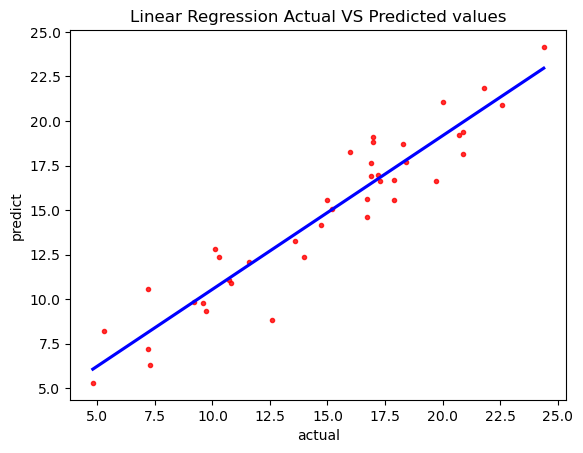

In [109]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red', marker=".",line_kws={"color": "blue"})
plt.title("Linear Regression Actual VS Predicted values")
plt.xlabel("actual")
plt.ylabel("predict")

In [99]:
#The final actual and predicted values 
data_pr=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data_pr

,Actual,Predicted
123,15.2,15.072942
37,14.7,14.134829
4,17.9,15.547703
138,9.6,9.802572
17,24.4,24.160206
145,10.3,12.355845
177,16.7,14.632658
90,14.0,12.367404
83,13.6,13.245804
110,18.4,17.676377


# Summary

In [110]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           8.13e-99
Time:                        19:45:01   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. *R-squared and adjusted R-squared :* 0.903 and 0.901 - with "90%" the model predicts accurately.
2. *F-stats and Prob(F-stats) (overall model fit)* - 605.4 and 8.13e-997 (approx. 0.0) - Model is significant and the explained "90%" accuracy is not random.
3. *p-values* - p-values for all coefficients except Newspaper are less than 0.05 significance level, which means that all predictors are statistically significant.
4. The relationship between the independent variables and the dependent variable is linear. This assumption is supported by a high R-squared value indicating that the model fits the data well.
5. Homoscedasticity. The variance of the residuals is constant across all values of the independent variables. A Durbin-Watson statistic is close to 2, it suggests that the assumption of independence of residuals is likely met, and there is no significant autocorrelation.
6. Normality. the residuals are normally distributed. This assumption confirms the Jarque-Bera statistic (the Jarque-Bera test statistic is always positive, and if it is not close to zero, it indicates that the sample data does not have a normal distribution.)
7. Independence. the residues are independent of each other. This assumption is supported by the absence of autocorrelation in the residuals.

<font color = Blue size = 5> Thank you for attention.If you have a questions leave me a comment.  </font>